In [193]:
import random
import numpy as np
from math import exp, log, sqrt, pi
import matplotlib.pyplot as plt


In [186]:
# client side revenue:
client_valuation_type = "uniform"  # "gaussian" ...


def client_valuation(type, x=0): 
    client_valuation_gaussian = lambda mu, sigma: 1/(sigma*sqrt(2*pi))*exp(-((x-mu)**2)/(2*sigma**2))
    client_valuation_uniform = lambda low, high: random.uniform(low, high)
    
    if type == "gaussian": 
        return client_valuation_gaussian
    elif type == "uniform":
        return client_valuation_uniform

In [87]:
client_valuation("uniform")(0, 10)

0.08835691901696863

In [88]:
client_cost = lambda varepsilon: random.uniform(0.5,1.5)*exp(varepsilon)

In [89]:
for varepsilon in [0.1*i for i in range(20)]:
    print(varepsilon, "<->", client_cost(varepsilon))

0.0 <-> 0.5920999820640039
0.1 <-> 1.6363043117150635
0.2 <-> 1.1577777831841376
0.30000000000000004 <-> 1.7866711216886535
0.4 <-> 1.493889504378477
0.5 <-> 1.7197420002344663
0.6000000000000001 <-> 2.1842907118035764
0.7000000000000001 <-> 2.2682961549191543
0.8 <-> 2.3404798897135803
0.9 <-> 2.9627306406370173
1.0 <-> 2.465600237743268
1.1 <-> 2.8907841594587924
1.2000000000000002 <-> 4.22778688122611
1.3 <-> 4.290124992799924
1.4000000000000001 <-> 5.845780972669317
1.5 <-> 4.2056322560946375
1.6 <-> 6.386028905894216
1.7000000000000002 <-> 3.5595623044454685
1.8 <-> 8.933100833816809
1.9000000000000001 <-> 9.822499097743151


In [161]:
# simulation
client_number = 1000

mu = 1 
sigma = 1

client_valuation_type = "gaussian"  
clients_privacy_budget = np.sort(np.absolute(np.random.normal(mu, sigma, client_number)))
# clients_privacy_budget = np.linspace(0.0, 4.0, num=client_number)
clients_privacy_cost = [client_cost(clients_privacy_budget[i]) for i in range(client_number)]  

Text(0.5, 0, 'client_privacy_budget')

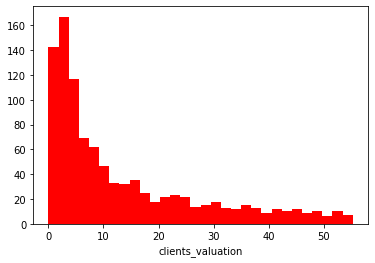

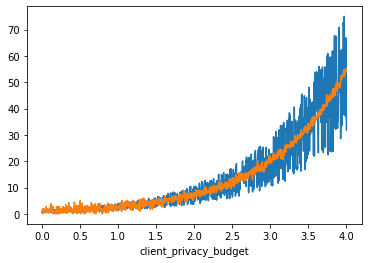

In [156]:
# plt.figure(0)
# plt.hist(clients_privacy_budget, 30)
# plt.xlabel("client_privacy_budget")
fig = plt.figure(1)
plt.xlabel("clients_valuation")

plt.figure(2)
plt.plot(clients_privacy_budget, clients_privacy_cost)
plt.xlabel("client_privacy_budget")

# plt.xlabel("privacy_budget")
# plt.ylabel("privacy_cost")

In [167]:

for server_budget in [0.2*i for i in range(30)]:
    clients_cost = [client_cost(server_budget) for i in range(client_number)]
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    max_profit = np.max(profits)
    sum_profit = np.sum(profits)
    
    print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "max_profit = ", max_profit, "total_profit = ", sum_profit)

server_budget =  0.0 clients participate: 887 max_profit =  62.84573025554654 total_profit =  3957.3025449930688
server_budget =  0.2 clients participate: 846 max_profit =  61.73129630077018 total_profit =  3771.232621307304
server_budget =  0.4 clients participate: 798 max_profit =  62.66180576152207 total_profit =  3562.660166225641
server_budget =  0.6000000000000001 clients participate: 736 max_profit =  61.05523152955425 total_profit =  3317.7651377220864
server_budget =  0.8 clients participate: 674 max_profit =  60.332943888427806 total_profit =  3054.339665114887
server_budget =  1.0 clients participate: 597 max_profit =  60.51120141140097 total_profit =  2781.8271977523095
server_budget =  1.2000000000000002 clients participate: 508 max_profit =  58.71140954594796 total_profit =  2471.1994911993943
server_budget =  1.4000000000000001 clients participate: 389 max_profit =  58.18079495163118 total_profit =  2138.426690119353
server_budget =  1.6 clients participate: 325 max_prof

ValueError: zero-size array to reduction operation maximum which has no identity

In [100]:
server_revenue = lambda epoch: (epoch)

server_budget =  0.1 clients participate: 1000 total_profit =  853.3988413866621
server_budget =  0.2 clients participate: 1000 total_profit =  956.4174077980873
server_budget =  0.30000000000000004 clients participate: 1000 total_profit =  955.6674242682126
server_budget =  0.4 clients participate: 1000 total_profit =  902.6839749274695
server_budget =  0.5 clients participate: 1000 total_profit =  827.9051278201108
server_budget =  0.6 clients participate: 1000 total_profit =  743.9574004497969
server_budget =  0.7 clients participate: 998 total_profit =  655.410887595199
server_budget =  0.7999999999999999 clients participate: 983 total_profit =  564.7359868328347
server_budget =  0.8999999999999999 clients participate: 955 total_profit =  473.9569719467581
server_budget =  0.9999999999999999 clients participate: 882 total_profit =  387.1096426999658
server_budget =  1.0999999999999999 clients participate: 750 total_profit =  313.09815468685224
server_budget =  1.2 clients participa

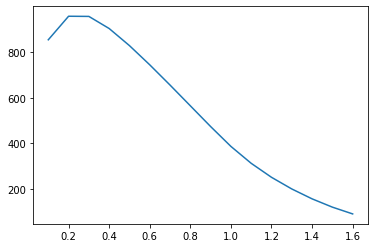

In [238]:
# increasing server_budget
epochs = 16
client_number = 1000
total_profits = []
server_budget = 0.1
server_budget_step = 0.1
server_budgetx = [server_budget+i*server_budget_step for i in range(epochs)]
clients_participating = []
min_clients = 0.2*client_number
np.random.seed = 1000
client_cost_coe = np.random.uniform(0.5, 1.5, client_number)

epoch = 1
while epoch <= epochs:
   
    clients_cost = [client_cost_coe[i]*server_budget for i in range(client_number)]
    # clients_valuation = [client_valuation(client_valuation_type, server_budget)(clients_privacy_budget[i], sigma) for i in range(client_number)]
    clients_valuation = [exp(client_valuation("gaussian", server_budget)(clients_privacy_budget[i], 1)) for i in range(client_number)]
    
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    if len(clients_enroll) < min_clients:
        server_budget -= server_budget_step
        continue
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    clients_participating.append(len(clients_enroll))

    # server_R = server_revenue(sqrt(len(clients_enroll)))
    # max_profit = np.max(profits)
    # active_f = lambda k: log(1+exp(k))
    active_f = lambda k: 1/(1+exp(-k)) 
    
    sum_profit = active_f(epoch)*np.sum(profits)
    # if epoch > 1 and sum_profit < total_profits[-1]:
    #     server_budget -= server_budget_step
    total_profits.append(sum_profit)
    
    print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "total_profit = ", sum_profit)
    server_budget += server_budget_step
    epoch += 1

plt.plot(server_budgetx, total_profits)

In [237]:
print(clients_participating)

[1000, 1000, 1000, 1000, 1000, 1000, 999, 987, 959, 860, 730, 614, 535, 451, 397, 346]


server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  366.9529123595735
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  442.11375450580164
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  478.142053583342
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  492.9192143630544
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  498.5878859447648
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  500.70621806674336
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  501.4900449667364
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  501.779016587116
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  501.8854071148806
server_budget =  1.8000000000000016 clients participate: 2178 total_profit =  501.9245573549967
server_budget =  1.8000000000000016 clie

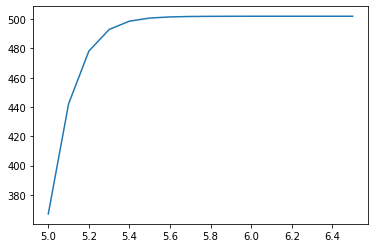

In [245]:
# decreasing server_budget
epochs = 16
client_number = 10000
clients_privacy_budget = np.sort(np.absolute(np.random.normal(mu, sigma, client_number)))
total_profits = []
server_budget = 5
server_budget_step = 0.1
server_budgetx = [server_budget+i*server_budget_step for i in range(epochs)]
clients_participating = []
min_clients = 0.2*client_number
np.random.seed = 1000
client_cost_coe = np.random.uniform(0.5, 1.5, client_number)

epoch = 1
while epoch <= epochs:
   
    clients_cost = [client_cost_coe[i]*server_budget for i in range(client_number)]
    # clients_valuation = [client_valuation(client_valuation_type, server_budget)(clients_privacy_budget[i], sigma) for i in range(client_number)]
    clients_valuation = [exp(client_valuation("gaussian", server_budget)(clients_privacy_budget[i], 1)) for i in range(client_number)]
    
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    if len(clients_enroll) < min_clients:
        server_budget -= server_budget_step
        continue
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    clients_participating.append(len(clients_enroll))

    # server_R = server_revenue(sqrt(len(clients_enroll)))
    # max_profit = np.max(profits)
    # active_f = lambda k: log(1+exp(k))
    active_f = lambda k: 1/(1+exp(-k)) 
    
    sum_profit = active_f(epoch)*np.sum(profits)
    # if epoch > 1 and sum_profit < total_profits[-1]:
    #     server_budget -= server_budget_step
    total_profits.append(sum_profit)
    
    print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "total_profit = ", sum_profit)
    # server_budget -= server_budget_step
    epoch += 1

plt.plot(server_budgetx, total_profits)

In [243]:
print(clients_participating)

[234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234]


server_budget =  2.9000000000000026 clients participate: 229 total_profit =  158.0898210150075
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  190.47044447383217
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  205.99207452717903
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  212.35833740203415
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  214.80050162954498
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  215.71311666742696
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  216.0508031938258
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  216.17529729158477
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  216.22113221733542
server_budget =  2.9000000000000026 clients participate: 229 total_profit =  216.23799883494272
server_budget =  2.9000000000000026 client

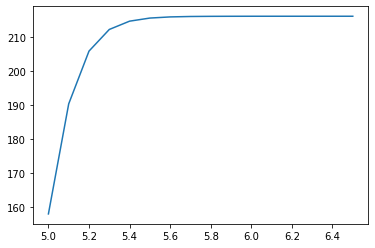

In [251]:
# decreasing server_budget
epochs = 16
client_number = 1000
clients_privacy_budget = np.sort(np.absolute(np.random.normal(mu, sigma, client_number)))
total_profits = []
server_budget = 5
server_budget_step = 0.1
server_budgetx = [server_budget+i*server_budget_step for i in range(epochs)]
clients_participating = []
min_clients = 0.2*client_number
np.random.seed = 1000
client_cost_coe = np.random.uniform(0.5, 1.5, client_number)

epoch = 1
while epoch <= epochs:
   
    clients_cost = [max(-(clients_privacy_budget[i] - server_budget)**3, 0) for i in range(client_number)]
    # clients_valuation = [client_valuation(client_valuation_type, server_budget)(clients_privacy_budget[i], sigma) for i in range(client_number)]
    clients_valuation = [exp(client_valuation("gaussian", server_budget)(clients_privacy_budget[i], 1)) for i in range(client_number)]
    
    clients_enroll = list(filter(lambda i: clients_valuation[i] > clients_cost[i], range(client_number)))
    if len(clients_enroll) < min_clients:
        server_budget -= server_budget_step
        continue
    profits = [clients_valuation[i]-clients_cost[i] for i in clients_enroll] 
    clients_participating.append(len(clients_enroll))

    # server_R = server_revenue(sqrt(len(clients_enroll)))
    # max_profit = np.max(profits)
    # active_f = lambda k: log(1+exp(k))
    active_f = lambda k: 1/(1+exp(-k)) 
    
    sum_profit = active_f(epoch)*np.sum(profits)
    # if epoch > 1 and sum_profit < total_profits[-1]:
    #     server_budget -= server_budget_step
    total_profits.append(sum_profit)
    
    print("server_budget = ", server_budget, "clients participate:", len(clients_enroll), "total_profit = ", sum_profit)
    # server_budget -= server_budget_step
    epoch += 1

plt.plot(server_budgetx, total_profits)